# stockmarket-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
start = '2010-01-01'
end = datetime.now()

In [2]:
# y_symbols = ['ZOMATO.NS','TATAPOWER.NS','ITC.NS']
y_symbols = ['TATAPOWER.NS']
data = pdr.get_data_yahoo(y_symbols,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,133.751373,135.097580,133.577682,134.079483,107.078499,3172720
2010-01-05,134.716400,137.997452,134.422058,136.033646,108.639137,4254349
2010-01-06,136.067413,144.366562,136.067413,142.344849,113.679375,8747201
2010-01-07,142.822540,144.945572,139.444977,142.933517,114.149506,5495560
2010-01-08,143.305054,144.077057,141.355713,142.856308,114.087852,3916987
...,...,...,...,...,...,...
2023-11-21,263.750000,265.399994,260.750000,262.649994,262.649994,6931541
2023-11-22,263.399994,263.600006,259.250000,262.100006,262.100006,4537969
2023-11-23,262.100006,263.750000,259.799988,260.750000,260.750000,5466513


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3432.000000,3432.000000,3432.000000,3432.000000,3432.000000,3.432000e+03
mean,108.419163,109.922223,106.665704,108.211698,97.806188,1.123005e+07
std,55.613899,56.267368,54.823936,55.512176,57.333231,2.032126e+07
min,27.250000,28.600000,27.000000,27.299999,25.675718,0.000000e+00
25%,74.000000,75.000000,72.737499,73.900002,64.337946,2.883399e+06
50%,87.720062,88.800003,86.103657,87.391151,74.826279,4.785414e+06
75%,123.400002,125.273701,121.750000,123.546322,101.069515,1.005400e+07
max,292.350006,298.049988,280.350006,289.799988,284.846130,3.606618e+08


In [5]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,133.751373,135.097580,133.577682,134.079483,107.078499,3172720
1,2010-01-05,134.716400,137.997452,134.422058,136.033646,108.639137,4254349
2,2010-01-06,136.067413,144.366562,136.067413,142.344849,113.679375,8747201
3,2010-01-07,142.822540,144.945572,139.444977,142.933517,114.149506,5495560
4,2010-01-08,143.305054,144.077057,141.355713,142.856308,114.087852,3916987


In [6]:
data = data.drop(['Date', 'Adj Close'], axis=1)
data.head()

,Open,High,Low,Close,Volume
0,133.751373,135.097580,133.577682,134.079483,3172720
1,134.716400,137.997452,134.422058,136.033646,4254349
2,136.067413,144.366562,136.067413,142.344849,8747201
3,142.822540,144.945572,139.444977,142.933517,5495560
4,143.305054,144.077057,141.355713,142.856308,3916987


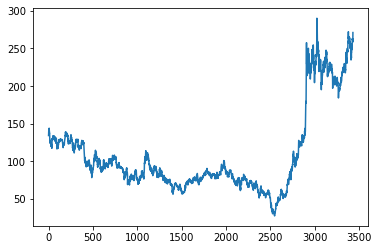

In [7]:
plt.plot(data.Close)

In [8]:
# MA moving average 100 days
ma100 = data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3427    243.8450
3428    244.2735
3429    244.6885
3430    245.0515
3431    245.5405
Name: Close, Length: 3432, dtype: float64

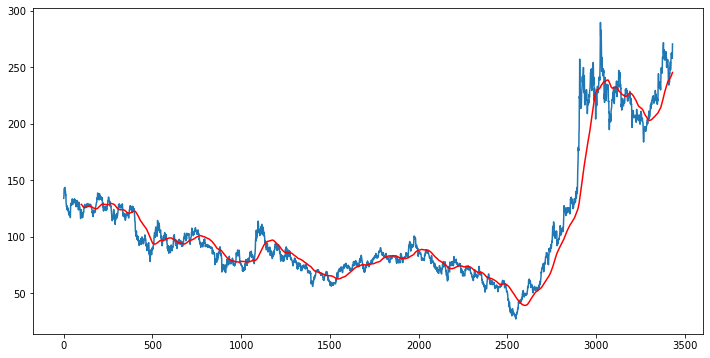

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [10]:
# 200 days moving average
ma200 = data.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3427    224.92075
3428    225.20950
3429    225.44875
3430    225.71025
3431    226.03275
Name: Close, Length: 3432, dtype: float64

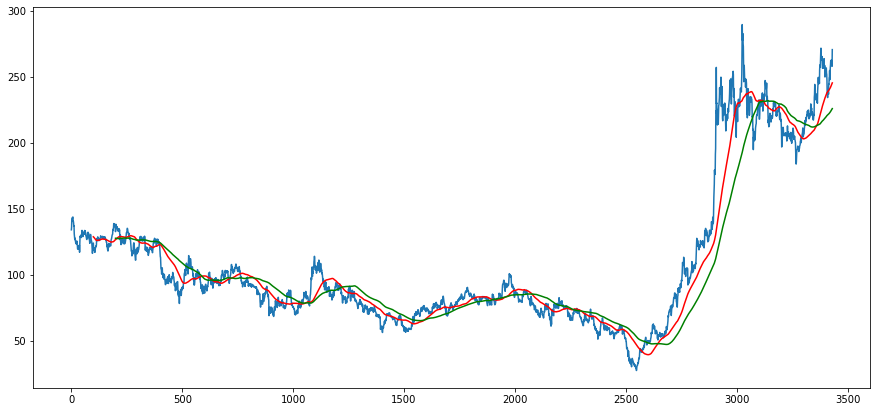

In [11]:
plt.figure(figsize=(15,7))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
data.shape

(3432, 5)

In [13]:
# spliting our data into testing and training

data_tarining = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

print(data_tarining.shape)
print(data_testing.shape)

(2402, 1)
(1030, 1)


In [14]:
data_tarining.head()

,Close
0,134.079483
1,136.033646
2,142.344849
3,142.933517
4,142.856308


In [15]:
data_testing.head()

,Close
2402,59.349998
2403,58.000000
2404,58.200001
2405,61.450001
2406,61.599998


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

C:\Users\panka\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
data_training_array = scaler.fit_transform(data_tarining)
data_training_array

array([[0.89540002],
       [0.91648664],
       [0.98458843],
       ...,
       [0.11869681],
       [0.12301307],
       [0.08902261]])

In [18]:
data_training_array.shape

(2402, 1)

In [19]:
x_train = []
y_train = [] 

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
             input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50

72/72 [==============================] - 27s 262ms/step - loss: 0.0285
Epoch 2/50
72/72 [==============================] - 18s 254ms/step - loss: 0.0099
Epoch 3/50
72/72 [==============================] - 20s 275ms/step - loss: 0.0078
Epoch 4/50
72/72 [==============================] - 20s 281ms/step - loss: 0.0075
Epoch 5/50
72/72 [==============================] - 19s 269ms/step - loss: 0.0075
Epoch 6/50
72/72 [==============================] - 20s 272ms/step - loss: 0.0076
Epoch 7/50
72/72 [==============================] - 19s 263ms/step - loss: 0.0065
Epoch 8/50
72/72 [==============================] - 19s 258ms/step - loss: 0.0060
Epoch 9/50
72/72 [==============================] - 18s 256ms/step - loss: 0.0052
Epoch 10/50
72/72 [==============================] - 19s 270ms/step - loss: 0.0054
Epoch 11/50
72/72 [==============================] - 20s 281ms/step - loss: 0.0049
Epoch 12/50
72/72 [==============================] - 19s 263ms/step - loss: 0.0047
Epoch 13/50

In [24]:
model.save('keras_model.h5')

C:\Users\panka\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sauravsevda123/stockmarket-analysis-d2a62" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/sauravsevda123/stockmarket-analysis-d2a62


'https://jovian.com/sauravsevda123/stockmarket-analysis-d2a62'

In [27]:
data_testing.head()

,Close
2402,59.349998
2403,58.000000
2404,58.200001
2405,61.450001
2406,61.599998


In [28]:
# for predicting the data for future we need past 100 day data which we can get from testing data
past_100_days = data_tarining.tail(100)
past_100_days

,Close
2302,64.500000
2303,64.400002
2304,63.799999
2305,62.599998
2306,63.200001
...,...
2397,63.799999
2398,63.650002
2399,62.099998
2400,62.500000


In [29]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [30]:
final_df.head()

,Close
0,64.500000
1,64.400002
2,63.799999
3,62.599998
4,63.200001


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14171429],
       [0.14133335],
       [0.13904763],
       ...,
       [0.88933338],
       [0.87942859],
       [0.92761904]])

In [32]:
input_data.shape

(1130, 1)

In [33]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i,0])

In [34]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1030, 100, 1)
(1030,)


In [35]:
# Making predictions
y_predicted = model.predict(x_test)

33/33 [==============================] - 4s 94ms/step


In [36]:
y_predicted.shape

(1030, 1)

In [37]:
y_test

array([0.12209524, 0.11695239, 0.1177143 , ..., 0.88933338, 0.87942859,
       0.92761904])

In [38]:
y_predicted

array([[0.20607819],
       [0.2032377 ],
       [0.2002828 ],
       ...,
       [0.8261045 ],
       [0.823416  ],
       [0.8184631 ]], dtype=float32)

In [39]:
scaler.scale_

array([0.00380952])

In [40]:
scale_factor = 1/0.00380952
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

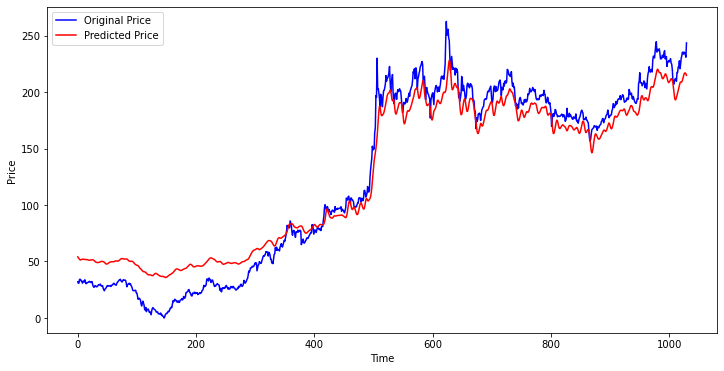

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()